# Лабораторная работа №3

ФИО: Беледа Владислав Валентинович  
Группа: БИВТ-21-4

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [1014]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

db = pd.read_csv('https://github.com/ta-k1/Beleda_Vladislav_BIVT-24-1/raw/main/winequality-red.csv')

## 2. Понимаем, какая перед нами задача

In [1015]:
db.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Text(0.5, 1.0, 'Quality Distribution')

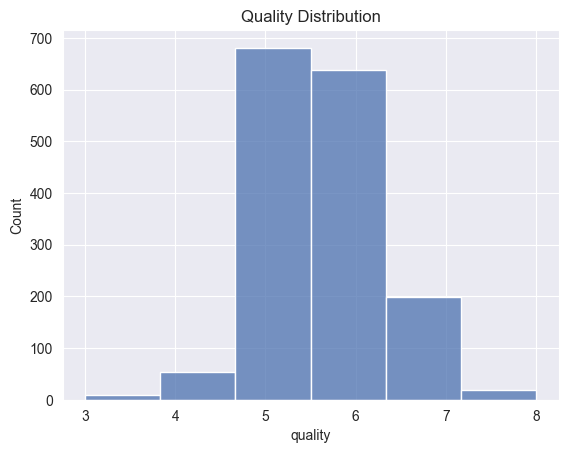

In [1016]:
palette = sns.color_palette('deep') 
sns.histplot(data=db, x='quality', bins=6)
plt.title("Quality Distribution")

Перед нами задача регресии. Необходимо спрогнозировать качество вина, другими словами на выходе мы получим вещественное число.

## 3. Делаем предобработку данных

## Логарифмирование

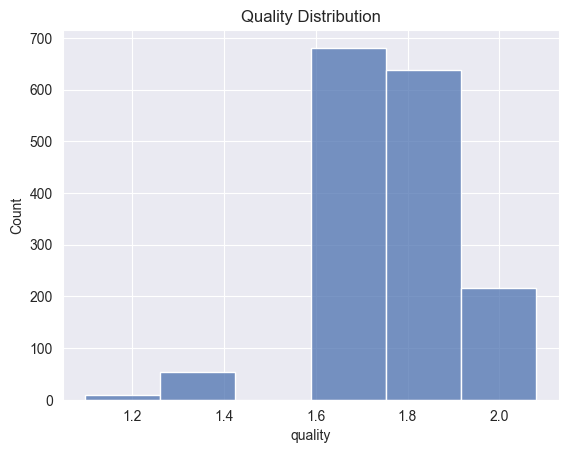

In [1017]:
db['quality'] = np.log(db['quality'])
sns.histplot(data=db, x='quality', bins=6)
plt.title("Quality Distribution")
plt.show()

In [1018]:
db

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.609438
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1.609438
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1.609438
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.791759
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1.609438
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1.791759
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1.791759
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1.609438


## Проверка и ликвидация (если есть) пропусков

In [1019]:
db.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Пропусков нет

## Кодирование категориальных признаков

In [1020]:
from sklearn.preprocessing import LabelEncoder

db['fixed acidity'] = LabelEncoder().fit_transform(db['fixed acidity']) 
db['volatile acidity'] = LabelEncoder().fit_transform(db['volatile acidity']) 
db['citric acid'] = LabelEncoder().fit_transform(db['citric acid']) 
db['residual sugar'] = LabelEncoder().fit_transform(db['residual sugar']) 
db['chlorides'] = LabelEncoder().fit_transform(db['chlorides']) 
db['free sulfur dioxide'] = LabelEncoder().fit_transform(db['free sulfur dioxide']) 
db['total sulfur dioxide'] = LabelEncoder().fit_transform(db['total sulfur dioxide']) 
db['density'] = LabelEncoder().fit_transform(db['density']) 
db['pH'] = LabelEncoder().fit_transform(db['pH']) 
db['sulphates'] = LabelEncoder().fit_transform(db['sulphates']) 
db['alcohol'] = LabelEncoder().fit_transform(db['alcohol'])

## Разделение выборки на тренировочную и тестовую

In [1021]:
X = db.drop(['quality'], axis=1)
y = db['quality']

In [1022]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [1023]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [1024]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
281,30,11,68,35,138,4,4,303,37,70,18
1536,14,44,8,10,40,24,39,148,72,30,24
673,35,82,21,7,37,4,7,271,32,14,12
50,41,68,26,7,37,3,17,295,27,36,7
117,31,48,12,11,45,7,22,287,49,12,11
...,...,...,...,...,...,...,...,...,...,...,...
596,77,29,51,11,22,6,18,402,16,22,10
12,9,59,0,5,52,16,53,87,70,14,18
675,46,30,39,15,27,12,25,372,38,27,23
1100,37,21,42,13,35,23,30,69,23,40,49


## Нормирование численных переменных

In [1025]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Обучение на тренировочном множестве

## Линейная модель

In [1026]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [1027]:
df_coef = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coef'])
df_coef.T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
Coef,0.035243,-0.195832,-0.037626,0.022093,-0.072371,0.061628,-0.090229,-0.019168,-0.066788,0.156062,0.22997


In [1028]:
lr_r2_score = lin_reg.score(X_test, y_test)
lr_r2_score

0.3467364424496414

In [1029]:
y_pred = lin_reg.predict(X_test)

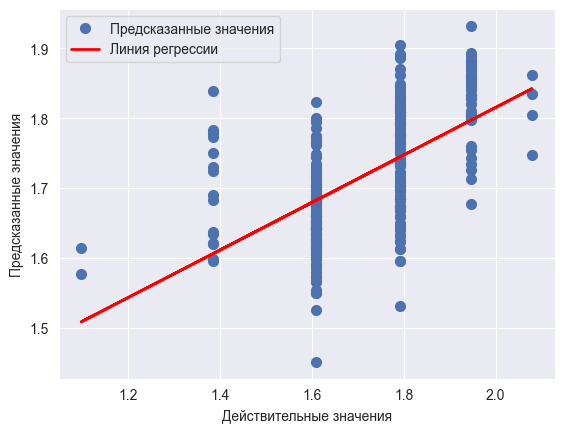

In [1030]:
# Указание цветовой палитры
palette = sns.color_palette("deep")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

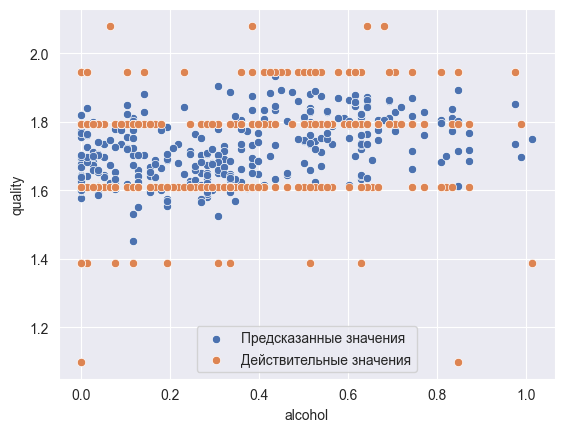

In [1031]:
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

plt.show()

## Деревянная модель

In [1032]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=6, random_state=0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [1033]:
tr_r2_score = tree_reg.score(X_test, y_test)
tr_r2_score

0.21640704140714973

In [1034]:
y_pred = tree_reg.predict(X_test)

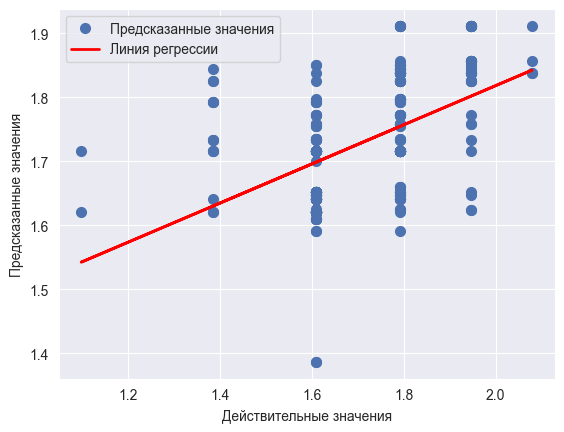

In [1035]:
# Указание цветовой палитры
palette = sns.color_palette("deep")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

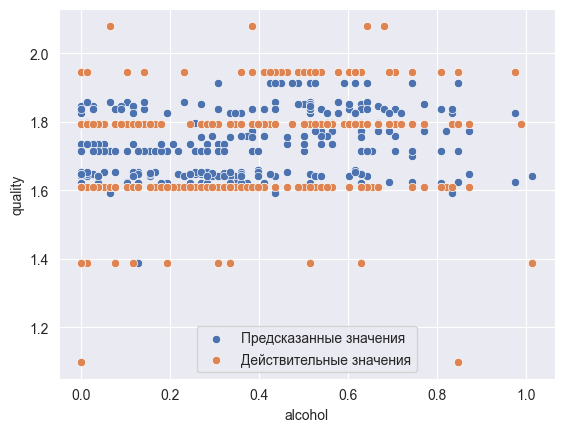

In [1036]:
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

plt.show()

K-ближайших соседей

In [1037]:
from sklearn.neighbors import KNeighborsRegressor

kn_reg = KNeighborsRegressor(n_neighbors=8)
kn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [1038]:
kn_r2_score = kn_reg.score(X_test, y_test)
kn_r2_score

0.2840853631565945

In [1039]:
y_pred = kn_reg.predict(X_test)

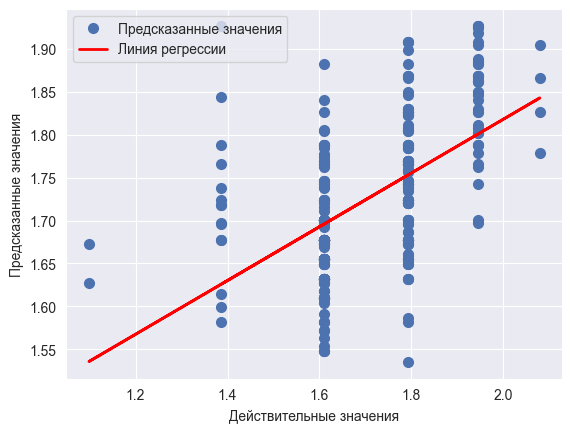

In [1040]:
# Указание цветовой палитры
palette = sns.color_palette("deep")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

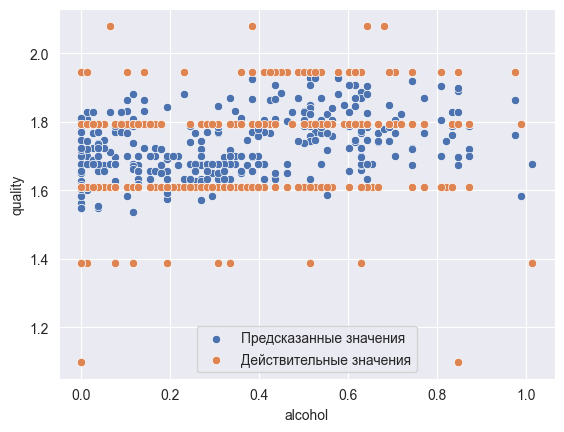

In [1041]:
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

plt.show()

## Случайный лес

In [1042]:
from sklearn.ensemble import RandomForestRegressor

rand_forest = RandomForestRegressor(n_estimators = 16, random_state = 0)
rand_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=16, random_state=0)

In [1043]:
rf_r2_score = rand_forest.score(X_test, y_test)
rf_r2_score

0.4556351023376558

In [1044]:
y_pred = rand_forest.predict(X_test)

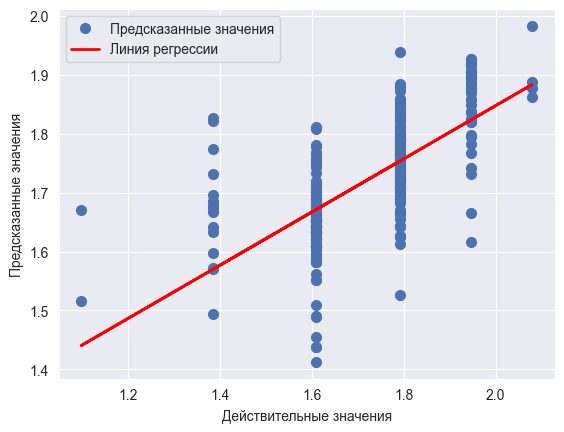

In [1045]:
# Указание цветовой палитры
palette = sns.color_palette("deep")

# Настройка цветовой палитры
sns.set_palette(palette)

# Построение точечного графика и линии регрессии
plt.plot(y_test, y_pred, 'o', markersize=7, label='Предсказанные значения')
a, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, a*y_test + b, color='red', linewidth=2, label='Линия регрессии')

plt.xlabel('Действительные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

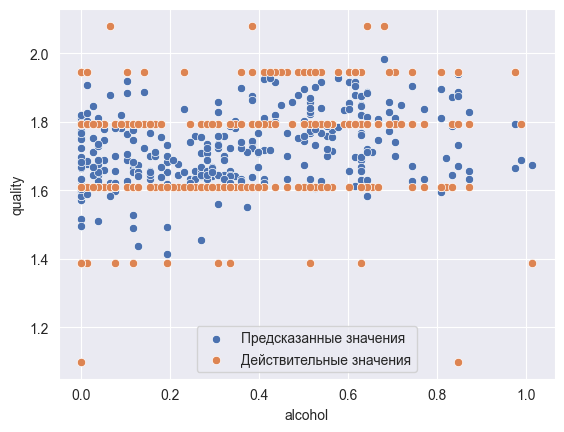

In [1046]:
sns.scatterplot(x=X_test[:, 2], y=y_pred, label='Предсказанные значения')
sns.scatterplot(x=X_test[:, 2], y=y_test, label='Действительные значения')

plt.xlabel('alcohol')
plt.ylabel('quality')
plt.legend()

plt.show()

## 5. Подсчет метрик на train и test множествах

In [1047]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

In [1048]:
columns = ['Train','Test']

## Линейная модель

In [1049]:
lr_mae = []
lr_mse = []
lr_rmse = []
lr_mape = []

In [1050]:
mae = mean_absolute_error(y_train, lin_reg.predict(X_train))
mse = mean_squared_error(y_train, lin_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, lin_reg.predict(X_train))

lr_mae.append(mae)
lr_mse.append(mse)
lr_rmse.append(rmse)
lr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.089476
1,MSE,0.013698
2,RMSE,0.117040
3,MAPE,0.053398


In [1051]:
lin_pred = lin_reg.predict(X_test)

mae = mean_absolute_error(y_test, lin_pred)
mse = mean_squared_error(y_test, lin_pred)
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
mape = mean_absolute_percentage_error(y_test, lin_pred)

lr_mae.append(mae)
lr_mse.append(mse)
lr_rmse.append(rmse)
lr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.089517
1,MSE,0.015014
2,RMSE,0.122531
3,MAPE,0.054283


## Деревянная модель

In [1052]:
tr_mae = []
tr_mse = []
tr_rmse = []
tr_mape = []

In [1053]:
mae = mean_absolute_error(y_train, tree_reg.predict(X_train))
mse = mean_squared_error(y_train, tree_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, tree_reg.predict(X_train))

tr_mae.append(mae)
tr_mse.append(mse)
tr_rmse.append(rmse)
tr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.074090
1,MSE,0.009481
2,RMSE,0.097373
3,MAPE,0.043295


In [1054]:
tree_pred = tree_reg.predict(X_test)

mae = mean_absolute_error(y_test, tree_pred)
mse = mean_squared_error(y_test, tree_pred)
rmse = np.sqrt(mean_squared_error(y_test, tree_pred))
mape = mean_absolute_percentage_error(y_test, tree_pred)

tr_mae.append(mae)
tr_mse.append(mse)
tr_rmse.append(rmse)
tr_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.095045
1,MSE,0.018009
2,RMSE,0.134198
3,MAPE,0.058045


## K-ближайших соседей

In [1055]:
kn_mae = []
kn_mse = []
kn_rmse = []
kn_mape = []

In [1056]:
mae = mean_absolute_error(y_train, kn_reg.predict(X_train))
mse = mean_squared_error(y_train, kn_reg.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, kn_reg.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, kn_reg.predict(X_train))

kn_mae.append(mae)
kn_mse.append(mse)
kn_rmse.append(rmse)
kn_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.079557
1,MSE,0.011247
2,RMSE,0.106050
3,MAPE,0.047500


In [1057]:
kn_pred = kn_reg.predict(X_test)

mae = mean_absolute_error(y_test, kn_pred)
mse = mean_squared_error(y_test, kn_pred)
rmse = np.sqrt(mean_squared_error(y_test, kn_pred))
mape = mean_absolute_percentage_error(y_test, kn_pred)

kn_mae.append(mae)
kn_mse.append(mse)
kn_rmse.append(rmse)
kn_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.094061
1,MSE,0.016454
2,RMSE,0.128272
3,MAPE,0.057514


## Случайный лес

In [1058]:
rf_mae = []
rf_mse = []
rf_rmse = []
rf_mape = []

In [1059]:
rf_t_mae = mean_absolute_error(y_train, rand_forest.predict(X_train))
mse = mean_squared_error(y_train, rand_forest.predict(X_train))
rmse = np.sqrt(mean_squared_error(y_train, rand_forest.predict(X_train)))
mape = mean_absolute_percentage_error(y_train, rand_forest.predict(X_train))

rf_mae.append(mae)
rf_mse.append(mse)
rf_rmse.append(rmse)
rf_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Train': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Train,Value
0,MAE,0.094061
1,MSE,0.002097
2,RMSE,0.045789
3,MAPE,0.017989


In [1060]:
forest_pred = rand_forest.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mean_squared_error(y_test, forest_pred))
mape = mean_absolute_percentage_error(y_test, forest_pred)

rf_mae.append(mae)
rf_mse.append(mse)
rf_rmse.append(rmse)
rf_mape.append(mape)

metrics_df = pd.DataFrame({
    'Metric Test': ['MAE', 'MSE', 'RMSE', 'MAPE'],
    'Value': [mae, mse, rmse, mape]
})

metrics_df

,Metric Test,Value
0,MAE,0.077764
1,MSE,0.012511
2,RMSE,0.111852
3,MAPE,0.047581


# 4. Сравнение метрик

In [1061]:
compare_r2 = pd.DataFrame({'linear': [lr_r2_score],
                'decisiontree': [tr_r2_score],
                'kneighbors': [kn_r2_score],
                'randomforest': [rf_r2_score]})

compare_r2

,linear,decisiontree,kneighbors,randomforest
0,0.346736,0.216407,0.284085,0.455635


Метод случайный лес показал лучший результат среди всех (0.460)

In [1062]:
df = pd.DataFrame({'Sample': columns,
                'MAE': lr_mae,
                'MSE': lr_mse, 
                'RMSE': lr_rmse, 
                'MAPE': lr_mape})
lr_metrics = df.set_index('Sample')
lr_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.089476,0.013698,0.117040,0.053398
Test,0.089517,0.015014,0.122531,0.054283


Средняя абсолютная ошибка (MAE) в процессе обучения равна 0.089, и на тестовом наборе она также равна 0.089. Это говорит о том, что модель демонстрирует одинаковую точность как на обучающем, так и на тестовом наборе данных, что является хорошим показателем и говорит о том, что модель хорошо обобщает данные без явных признаков переобучения.

In [1063]:
df = pd.DataFrame({'Sample': columns,
                'MAE': tr_mae,
                'MSE': tr_mse, 
                'RMSE': tr_rmse, 
                'MAPE': tr_mape})
tr_metrics = df.set_index('Sample')
tr_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.074090,0.009481,0.097373,0.043295
Test,0.095045,0.018009,0.134198,0.058045


Средняя абсолютная ошибка (MAE) в процессе обучения равна 0.07, в то время как на тестовом наборе она равна 0.08. Это необязательно означает, что модель переобучилась, так как разница незначительна. 

In [1064]:
df = pd.DataFrame({'Sample': columns,
                'MAE': kn_mae,
                'MSE': kn_mse, 
                'RMSE': kn_rmse, 
                'MAPE': kn_mape})
kn_metrics = df.set_index('Sample')
kn_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.079557,0.011247,0.106050,0.047500
Test,0.094061,0.016454,0.128272,0.057514


По метрике MAE видно, что результаты предсказаний недалеки от истинных значений целевой переменной, при этом разница между метриками не велика, чтобы говорить о переобучении.

In [1065]:
df = pd.DataFrame({'Sample': columns,
                'MAE': rf_mae,
                'MSE': rf_mse, 
                'RMSE': rf_rmse, 
                'MAPE': rf_mape})
rf_metrics = df.set_index('Sample')
rf_metrics

,MAE,MSE,RMSE,MAPE
Sample,,,,
Train,0.094061,0.002097,0.045789,0.017989
Test,0.077764,0.012511,0.111852,0.047581


Аналогично предыдущей модели разница между метриками MAE для тестовой и тренировочной выборке не слишком значительна, что говорит о том, что модель может все еще хорошо обобщать свои знания на новые данные.

В результате получаем, что все модели продемонстрировали нормальное обучение.